In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('./train.csv')

In [3]:
train.shape

(8693, 14)

In [4]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train.drop('Name', axis=1, inplace=True)

In [8]:
train['HomePlanet'].value_counts()
train['HomePlanet'].fillna('Earth', inplace=True)

In [9]:
train['CryoSleep'].value_counts()
train['CryoSleep'].fillna('False', inplace=True)

In [10]:
train['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [11]:
def sp(x):
    x = str(x)
    return x.split('/')[0]

train['Cabin'] = train['Cabin'].apply(sp)
train['Cabin'].value_counts()
train['Cabin'] = train['Cabin'].str.replace('nan', 'F')

In [12]:
train = train[train['Cabin'].notna()]

In [13]:
train['Destination'].value_counts()
train['Destination'].fillna('TRAPPIST-1e', inplace=True)

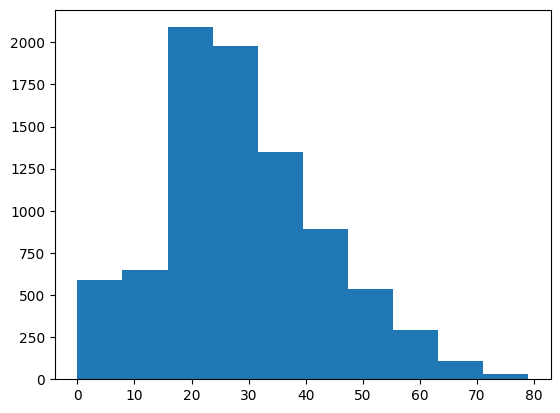

In [14]:
import matplotlib.pyplot as plt
plt.hist(train['Age'])
plt.show()

In [15]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Age'] = train['Age'].astype(int)

In [16]:
train['VIP'].value_counts()
train['VIP'].fillna('False', inplace=True)

In [17]:
train['RoomService'].fillna(train['RoomService'].median(), inplace=True)
train['FoodCourt'].fillna(train['FoodCourt'].median(), inplace=True)
train['ShoppingMall'].fillna(train['ShoppingMall'].median(), inplace=True)
train['Spa'].fillna(train['Spa'].median(), inplace=True)
train['VRDeck'].fillna(train['VRDeck'].median(), inplace=True)

In [18]:
train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [19]:
train.shape

(8693, 13)

In [20]:
train.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,True
5,0005_01,Earth,False,F,PSO J318.5-22,44,False,0.0,483.0,0.0,291.0,0.0,True
6,0006_01,Earth,False,F,TRAPPIST-1e,26,False,42.0,1539.0,3.0,0.0,0.0,True
7,0006_02,Earth,True,G,TRAPPIST-1e,28,False,0.0,0.0,0.0,0.0,0.0,True
8,0007_01,Earth,False,F,TRAPPIST-1e,35,False,0.0,785.0,17.0,216.0,0.0,True
9,0008_01,Europa,True,B,55 Cancri e,14,False,0.0,0.0,0.0,0.0,0.0,True


In [21]:
train['VIP'] = train['VIP'].astype(bool)
train['VIP'] = train['VIP'].astype(int)

In [22]:
train['CryoSleep'] = train['CryoSleep'].astype(bool)
train['CryoSleep'] = train['CryoSleep'].astype(int)

In [23]:
a = pd.get_dummies(train['Destination'])
train = pd.concat([train, a], axis=1)

train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,Europa,0,B,TRAPPIST-1e,39,0,0.0,0.0,0.0,0.0,0.0,False,0,0,1
1,0002_01,Earth,0,F,TRAPPIST-1e,24,0,109.0,9.0,25.0,549.0,44.0,True,0,0,1
2,0003_01,Europa,0,A,TRAPPIST-1e,58,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1
3,0003_02,Europa,0,A,TRAPPIST-1e,33,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1
4,0004_01,Earth,0,F,TRAPPIST-1e,16,0,303.0,70.0,151.0,565.0,2.0,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A,55 Cancri e,41,1,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0
8689,9278_01,Earth,1,G,PSO J318.5-22,18,0,0.0,0.0,0.0,0.0,0.0,False,0,1,0
8690,9279_01,Earth,0,G,TRAPPIST-1e,26,0,0.0,0.0,1872.0,1.0,0.0,True,0,0,1
8691,9280_01,Europa,0,E,55 Cancri e,32,0,0.0,1049.0,0.0,353.0,3235.0,False,1,0,0


In [24]:
a = pd.get_dummies(train['HomePlanet'])
train = pd.concat([train, a], axis=1)

In [25]:
train.drop(['HomePlanet', 'Destination', 'PassengerId'], axis=1, inplace=True)

In [26]:
train['Transported'] = train['Transported'].astype(bool)
train['Transported'] = train['Transported'].astype(int)

In [27]:
train['Cabin'].value_counts()
def convert(x):
    if x == 'A':
        return 8
    elif x == 'B':
        return 7
    elif x == 'C':
        return 6
    elif x == 'D':
        return 5
    elif x == 'E':
        return 4
    elif x == 'F':
        return 3
    elif x == 'G':
        return 2
    elif x == 'T':
        return 1

train['Cabin'] = train['Cabin'].apply(convert)

In [28]:
X = train.drop('Transported', axis= 1)
y = train['Transported']

In [29]:
from sklearn.preprocessing import StandardScaler, Normalizer

standard = StandardScaler()
normal = Normalizer()
X_stand = standard.fit_transform(X)
X_normal = normal.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_stand, X_test_stand, y_train_stand, y_test_stand = train_test_split(X_stand, y, test_size=0.3, random_state=42)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model = rfc.fit(X_train, y_train)
model_stand = rfc.fit(X_train_stand, y_train)
model_normal = rfc.fit(X_train_normal, y_train)

In [32]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_stand = model_stand.predict(X_test_stand)
y_pred_normal = model_normal.predict(X_test_normal)

c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [33]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.25      0.69      0.37       470
           1       0.89      0.55      0.68      2138

    accuracy                           0.58      2608
   macro avg       0.57      0.62      0.53      2608
weighted avg       0.78      0.58      0.62      2608



In [34]:
print(classification_report(y_pred_stand, y_test_stand))

              precision    recall  f1-score   support

           0       0.45      0.74      0.56       795
           1       0.84      0.61      0.71      1813

    accuracy                           0.65      2608
   macro avg       0.65      0.67      0.63      2608
weighted avg       0.72      0.65      0.66      2608



In [35]:
print(classification_report(y_pred_normal, y_test_normal))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1270
           1       0.79      0.78      0.79      1338

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608

